# Assignment 1 - Suman Kumar Pal (SR -  24974)

Link for the codes:

https://github.com/suman122003/SKP_IISc/tree/main/PH_204_QM2/asg1.ipynb

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy.optimize import curve_fit
import scipy.constants as const

In [2]:
e, me, mp = const.e, const.m_e, const.m_p
ep0 = const.epsilon_0
kB, hbar, c = const.Boltzmann, const.hbar, const.c
r0 = 1.2e-15
print('All in SI units:')
print(f'e = {e}, me = {me}, mp = {mp}')
print(f'ep0 = {ep0}')
print(f'kB = {kB}, hbar = {hbar}, c = {c}')
print(f'r0 = {r0}')

All in SI units:
e = 1.602176634e-19, me = 9.1093837015e-31, mp = 1.67262192369e-27
ep0 = 8.8541878128e-12
kB = 1.380649e-23, hbar = 1.0545718176461565e-34, c = 299792458.0
r0 = 1.2e-15


## Question 3

**Calculation of lifetime for $_{92}U^{238}$**

In [3]:
Z, A = 92, 238
u = 931  # MeV
Mi = 238.050784   # in u
Mf = 234.043593   # in u
Ma = 4.002602     # in u
delM = (Mi-Mf-Ma)
Q = delM*u
E = Q*(A-4)/A
print(f'delM = {delM}, Q = {Q} MeV, E = {E} MeV')

K1 = np.pi*np.sqrt(2*Ma*mp)*e**2/(hbar*4*np.pi*ep0)
K1 = K1/np.sqrt(1e6*e)          # in (MeV)^1/2
K2 = 4*np.sqrt(Ma*mp*e**2/(4*np.pi*ep0))/hbar
K2 = K2*np.sqrt(1e-15)          # in (fm)^-1/2
print(f'K1 = {K1}, K2 = {K2}')
gam = lambda E, Z, A: K1*Z/np.sqrt(E) - K2*np.sqrt(Z*r0*1e15*A**(1/3))
gam1 = gam(E, Z, A)
T1 = np.exp(-2*gam1)
print(f'gam = {gam1}. Transmission probability = {T1}')
r1 = r0*A**(1/3)
v1 = np.sqrt(2*E/(Ma*u))*c
print(f'r1 = {r1}, v1 = {v1}')
tau1 = (2*r1/v1)*np.exp(2*gam1)
tau1y = tau1/(3600*24*365)
print(f'lifetime = {tau1} s = {tau1y} years')

delM = 0.004589000000005505, Q = 4.2723590000051255 MeV, E = 4.200554647063862 MeV
K1 = 1.9868533028891406, K2 = 1.4906820554112288
gam = 50.19562342327302. Transmission probability = 2.5155645340753817e-44
r1 = 7.436585321689351e-15, v1 = 14234524.877389105
lifetime = 4.153604313615301e+22 s = 1317099287676084.8 years


**Calculation of lifetime for $_{84}Po^{212}$**

In [4]:
Z, A = 84, 212
u = 931  # MeV
Mi = 211.988842   # in u
Mf = 207.976627   # in u
Ma = 4.002602     # in u
delM = (Mi-Mf-Ma)
Q = delM*u
E = Q*(A-4)/A
print(f'delM = {delM}, Q = {Q} MeV, E = {E} MeV')

K1 = np.pi*np.sqrt(2*Ma*mp)*e**2/(hbar*4*np.pi*ep0)
K1 = K1/np.sqrt(1e6*e)          # in (MeV)^1/2
K2 = 4*np.sqrt(Ma*mp*e**2/(4*np.pi*ep0))/hbar
K2 = K2*np.sqrt(1e-15)          # in (fm)^-1/2
print(f'K1 = {K1}, K2 = {K2}')
gam = lambda E, Z, A: K1*Z/np.sqrt(E) - K2*np.sqrt(Z*r0*1e15*A**(1/3))
gam1 = gam(E, Z, A)
T1 = np.exp(-2*gam1)
print(f'gam = {gam1}. Transmission probability = {T1}')
r1 = r0*A**(1/3)
v1 = np.sqrt(2*E/(Ma*u))*c
print(f'r1 = {r1}, v1 = {v1}')
tau1 = (2*r1/v1)*np.exp(2*gam1)
print(f'lifetime = {tau1} s')

delM = 0.009612999999997207, Q = 8.949702999997399 MeV, E = 8.780840679242731 MeV
K1 = 1.9868533028891406, K2 = 1.4906820554112288
gam = 19.776027955504325. Transmission probability = 6.649061805826418e-18
r1 = 7.155278349292429e-15, v1 = 20580584.50503724
lifetime = 0.00010457754776454071 s


## Question 4

In [5]:
g = const.g
print(f'g = {g}')

g = 9.80665


In [6]:
c1 = (3*np.pi*hbar/(2*np.sqrt(2*g)))
def En(n, m):
    return m*g*(c1*(n-0.25)/m)**(2/3)

for ni in range(1, 5):
    print(f'n={ni}, En={En(ni, 0.1)} J = {En(ni, 0.1)/e} eV')

h1 = 1  # 1 m
n1 = 0.25 + 0.1*h1**(3/2)/c1
print(f'For h={h1}, n={n1}')

n=1, En=8.74157100000767e-23 J = 0.0005456059472159091 eV
n=2, En=1.5378265202777402e-22 J = 0.0009598358181259934 eV
n=3, En=2.0785977025660495e-22 J = 0.0012973586422719292 eV
n=4, En=2.5560508663869607e-22 J = 0.001595361467733751 eV
For h=1, n=8.911648385115607e+32


## Question 5

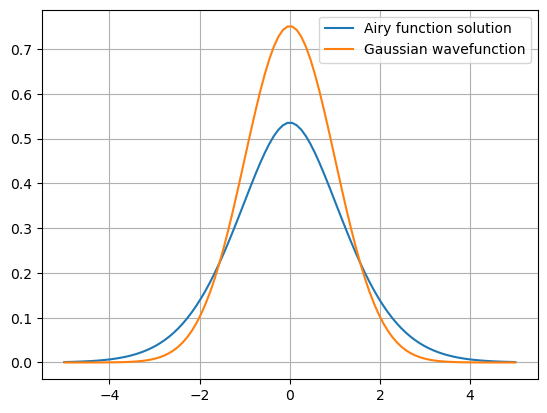

In [7]:
import scipy.special as sp

x = np.linspace(-5, 5, 100)
Ai = lambda x: sp.airy(x - 1.0188)[0]
psi_exact = lambda x: Ai(abs(x))

psi2 = np.array([(1/np.pi**(1/4))*np.exp(-(x[i])**2/2) for i in range(len(x))])
psi1 = np.array([psi_exact(x[i]) for i in range(len(x))])

plt.plot(x, psi1, label='Airy function solution')
plt.plot(x, psi2, label='Gaussian wavefunction')
plt.legend()
plt.grid()
plt.show()

## Question 8

In [8]:
import sympy as sp

In [9]:
As, xs = sp.symbols('A x', real=True)
Bs, Cs = sp.symbols('B C', real=True, positive=True)
ms, ws, hbars = sp.symbols('m omega hbar', real=True, positive=True)

psis = As*(Bs*xs**2-1)*sp.exp(-Cs*xs**2)
display('psi', psis)
intg1 = (sp.integrate(psis**2, (xs, -sp.oo, sp.oo))).simplify()
display('int psi2', intg1)

intg = xs**2*psis**2
display('psi* x2 psi', intg.as_poly())
intg2 = sp.integrate(intg, (xs, -sp.oo, sp.oo))
display('int psi* x2 psi', intg2)
V2 = (sp.Rational(1,2)*ms*ws**2 * (intg2/intg1)).simplify()
display('V2', V2)

psipp = sp.diff(sp.diff(psis, xs), xs)
display('d2/dx2 psi', psipp.simplify())
intg = psis*psipp
display('psi* d/dx2 psi', intg.as_poly())
intg3 = sp.integrate(intg, (xs, -sp.oo, sp.oo))
display('int psi* d/dx2 psi', intg3)
T2 = ((-hbars**2/(2*ms)) * (intg3/intg1)).simplify()
display('T2', T2)

'psi'

A*(B*x**2 - 1)*exp(-C*x**2)

'int psi2'

sqrt(2)*sqrt(pi)*A**2*(3*B**2 - 8*B*C + 16*C**2)/(32*C**(5/2))

'psi* x2 psi'

Poly(x**6*A**2*B**2*(exp(-C*x**2))**2 - 2*x**4*A**2*B*(exp(-C*x**2))**2 + x**2*A**2*(exp(-C*x**2))**2, x, A, B, exp(-C*x**2), domain='ZZ')

'int psi* x2 psi'

15*sqrt(2)*sqrt(pi)*A**2*B**2/(128*C**(7/2)) - 3*sqrt(2)*sqrt(pi)*A**2*B/(16*C**(5/2)) + sqrt(2)*sqrt(pi)*A**2/(8*C**(3/2))

'V2'

m*omega**2*(15*B**2 - 24*B*C + 16*C**2)/(8*C*(3*B**2 - 8*B*C + 16*C**2))

'd2/dx2 psi'

2*A*(2*B*C**2*x**4 - 5*B*C*x**2 + B - 2*C**2*x**2 + C)*exp(-C*x**2)

'psi* d/dx2 psi'

Poly(4*x**6*A**2*B**2*C**2*(exp(-C*x**2))**2 - 10*x**4*A**2*B**2*C*(exp(-C*x**2))**2 - 8*x**4*A**2*B*C**2*(exp(-C*x**2))**2 + 2*x**2*A**2*B**2*(exp(-C*x**2))**2 + 12*x**2*A**2*B*C*(exp(-C*x**2))**2 + 4*x**2*A**2*C**2*(exp(-C*x**2))**2 - 2*A**2*B*(exp(-C*x**2))**2 - 2*A**2*C*(exp(-C*x**2))**2, x, A, B, C, exp(-C*x**2), domain='ZZ')

'int psi* d/dx2 psi'

-7*sqrt(2)*sqrt(pi)*A**2*B**2/(32*C**(3/2)) - sqrt(2)*sqrt(pi)*A**2*B/(4*sqrt(C)) - sqrt(2)*sqrt(pi)*A**2*sqrt(C)/2

'T2'

C*hbar**2*(7*B**2 + 8*B*C + 16*C**2)/(2*m*(3*B**2 - 8*B*C + 16*C**2))

In [10]:
E2 = T2 + V2
E2 = E2.simplify()
display('E2', E2)
E2b = E2.subs(Bs, 2*ms*ws/hbars)
display('E2, b fixed', E2b, E2b.simplify())
E2c = E2b.subs(Cs, ms*ws/(2*hbars))
display('E2, c fixed', E2c)

'E2'

(4*C**2*hbar**2*(7*B**2 + 8*B*C + 16*C**2) + m**2*omega**2*(15*B**2 - 24*B*C + 16*C**2))/(8*C*m*(3*B**2 - 8*B*C + 16*C**2))

'E2, b fixed'

(4*C**2*hbar**2*(16*C**2 + 16*C*m*omega/hbar + 28*m**2*omega**2/hbar**2) + m**2*omega**2*(16*C**2 - 48*C*m*omega/hbar + 60*m**2*omega**2/hbar**2))/(8*C*m*(16*C**2 - 16*C*m*omega/hbar + 12*m**2*omega**2/hbar**2))

(16*C**4*hbar**4 + 16*C**3*hbar**3*m*omega + 32*C**2*hbar**2*m**2*omega**2 - 12*C*hbar*m**3*omega**3 + 15*m**4*omega**4)/(8*C*m*(4*C**2*hbar**2 - 4*C*hbar*m*omega + 3*m**2*omega**2))

'E2, c fixed'

5*hbar*omega/2

## Question 10

**10. (a)**

In [11]:
from scipy.integrate import quad, simps

a = 5e-11, L = 1e-10, E = 1e-19, V0 = 1.5e-19
m = 9.1093837015e-31, hbar = 1.0545718176461565e-34


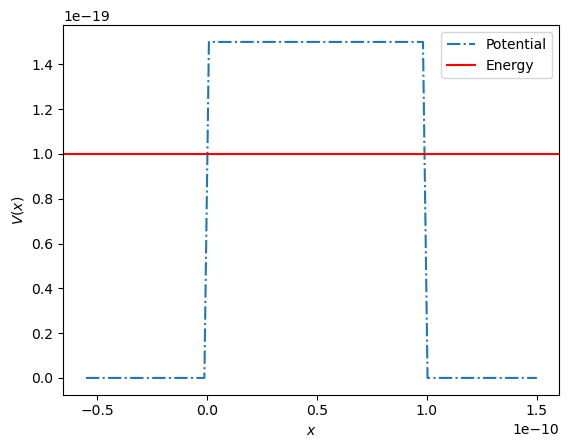

T = 0.5641707662671719.


In [12]:
a, L = 0.5e-10, 1e-10
E, V0 = 1e-19, 1.5e-19
m, hbar = const.m_e, const.hbar
print(f'a = {a}, L = {L}, E = {E}, V0 = {V0}')
print(f'm = {m}, hbar = {hbar}')
def Vx(x, V0):
    Vx = []
    for xi in x:
        if xi <= L and xi >= 0:
            Vx.append(V0)
        else:
            Vx.append(0)
    return np.array(Vx)

x = np.linspace(-a*1.1, 1.5*L, 100)
plt.plot(x, Vx(x, V0), '-.', label='Potential')
plt.axhline(E, color='red', label='Energy')
plt.xlabel('$x$')
plt.ylabel('$V(x)$')
plt.legend()
plt.show()

abs_px = lambda x: np.sqrt(2*m*abs(Vx(x, V0)-E))
def Twkb(x):
    'INPUT: x=np.linspace(x1,x2,100)'
    intg = simps(abs_px(x), x)
    return np.exp(-2*intg/hbar)
x1x2 = np.linspace(0, L, 1000)
Tval = Twkb(x1x2)
print(f'T = {Tval}.')

**10. (b)**

C:\Users\suman\AppData\Local\Temp\ipykernel_16416\843493906.py:17: RuntimeWarning: divide by zero encountered in double_scalars
  C2 = 1/simps([1/px(x3i, V0) for x3i in x3], x3)


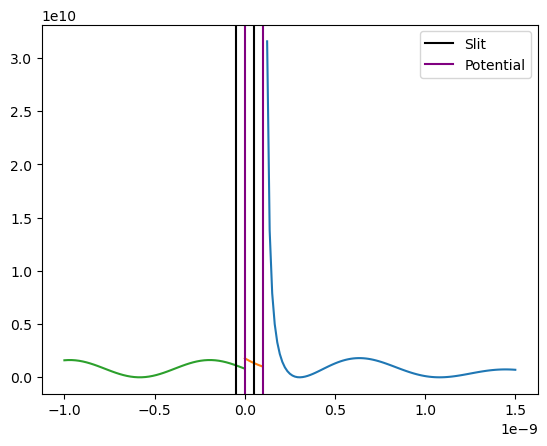

In [13]:
def Vx(x, V0):
    if x<=L and x>=0:
        return V0
    else:
        return 0
px = lambda x, V0: np.sqrt(2*m*(E-Vx(x, V0)))
abs_px = lambda x, V0: np.sqrt(2*m*np.abs(E-Vx(x, V0)))
x1x2 = np.linspace(0, L, 1000)
intg = simps([abs_px(x1x2i, V0) for x1x2i in x1x2], x1x2)
Twkb = lambda V0: np.exp(-2*intg/hbar)
xL, xR = -20*a, 15*L

def psi2_3(x, V0):
    x3 = np.linspace(L*1.1, x, 100)
    intg = simps([px(x3i, V0) for x3i in x3], x3)
    psi2 = (1/px(x, V0)) * (np.sin(intg/hbar - np.pi/4))**2
    C2 = 1/simps([1/px(x3i, V0) for x3i in x3], x3)
    return C2*psi2
x3 = np.linspace(L*1.1, xR, 100)
psi23 = [psi2_3(x3i, V0) for x3i in x3]
psi2 = [1/px(x3i, V0) for x3i in x3]
C2 = 1/simps(psi2, x3)

def psi2_2(x, V0):
    x2 = np.linspace(x, L*0.99, 100)
    intg = simps([abs_px(x2i, V0) for x2i in x2], x2)
    psi2 = (1/abs_px(x, V0))*np.exp(2*intg/hbar)
    return C2*psi2
x2 = np.linspace(0.01*a, L*0.99, 100)
psi22 = [psi2_2(x2i, V0) for x2i in x2]

def psi2_1(x, V0):
    x1 = np.linspace(x, -0.001*a, 100)
    intg = simps([px(x1i, V0) for x1i in x1], x1)
    psi2 = (4/px(x, V0))*Twkb(V0)*(np.cos(intg/hbar - np.pi/4))**2
    return C2*psi2
x1 = np.linspace(xL, -0.001*a)
psi21 = [psi2_1(x1i, V0) for x1i in x1]

plt.plot(x3, psi23)
plt.plot(x2, psi22)
plt.plot(x1, psi21)
plt.axvline(a, color='black', label='Slit')
plt.axvline(-a, color='black')
plt.axvline(0, color='purple', label='Potential')
plt.axvline(L, color='purple')
plt.legend()
plt.show()

As we have applied potential accross 1 slit only, we can expect the result of single slit diffraction here.